## **Detecting Creditcard Fraud**
  - Dataset link: https://www.kaggle.com/mlg-ulb/creditcardfraud
  - Observed the creditcard.csv dataset collected from kaggle
  - There are 284807 rows and 31 columns
  - Removing the duplicates 
  - In Features Scaling, using mean value
  - The Time vs Class graph visualize the skewness of the dataset
  - SMOTE Algorithm is used to balance the dataset on oversampled criterion
  - In Feature selection, Unnecessary column is dropped manually 
  - Splitting the dataset
  - 3 model is used to test the dataset considering performance metrics and ROC curve
    - Logistic Regression 
    - Gradient Boosting 
    - Random Forest 
  - Based on the best result as well as considering the false positive values the final model is selected for the fraudulent detection of credit card 



## **Libraries and Dataset**

In [1]:
# Importing necessary libraries 

import numpy as np
import pandas as pd

from imblearn.over_sampling import SMOTE
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mounting drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read Dataset

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Creditcard Fraud detection/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## **Dataset statistics**

In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are no missing values in the dataset,
All the features are numeric

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Checking for duplicate values
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [9]:
# Removing duplicates
df.drop_duplicates(inplace = True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


As there were (284807 rows × 31 columns) and 1081  duplicate columns, after dropping the duplicates the dataset is reduced to (283726 rows × 31 columns)

In [10]:
# The ratio of normal and fraudulent transactions

counts = df.Class.value_counts()
normal = counts[0]
fraud = counts[1]
perc_normal = (normal / (normal + fraud)) * 100
perc_fraud = (fraud / (normal + fraud)) * 100
print('Normal operations {0},{1:6.3}% of the total'.format(normal, perc_normal))
print('Fraud transactions {0},{1:6.3}% of the total'.format(fraud, perc_fraud))

Normal operations 283253,  99.8% of the total
Fraud transactions 473, 0.167% of the total


As you can see, the data is highly unbalanced.

## **Graphical Co-relation**

Relation of class with time

In [11]:
# converting to seconds to hours
df['Time']=(df['Time']/3600).round(0) 

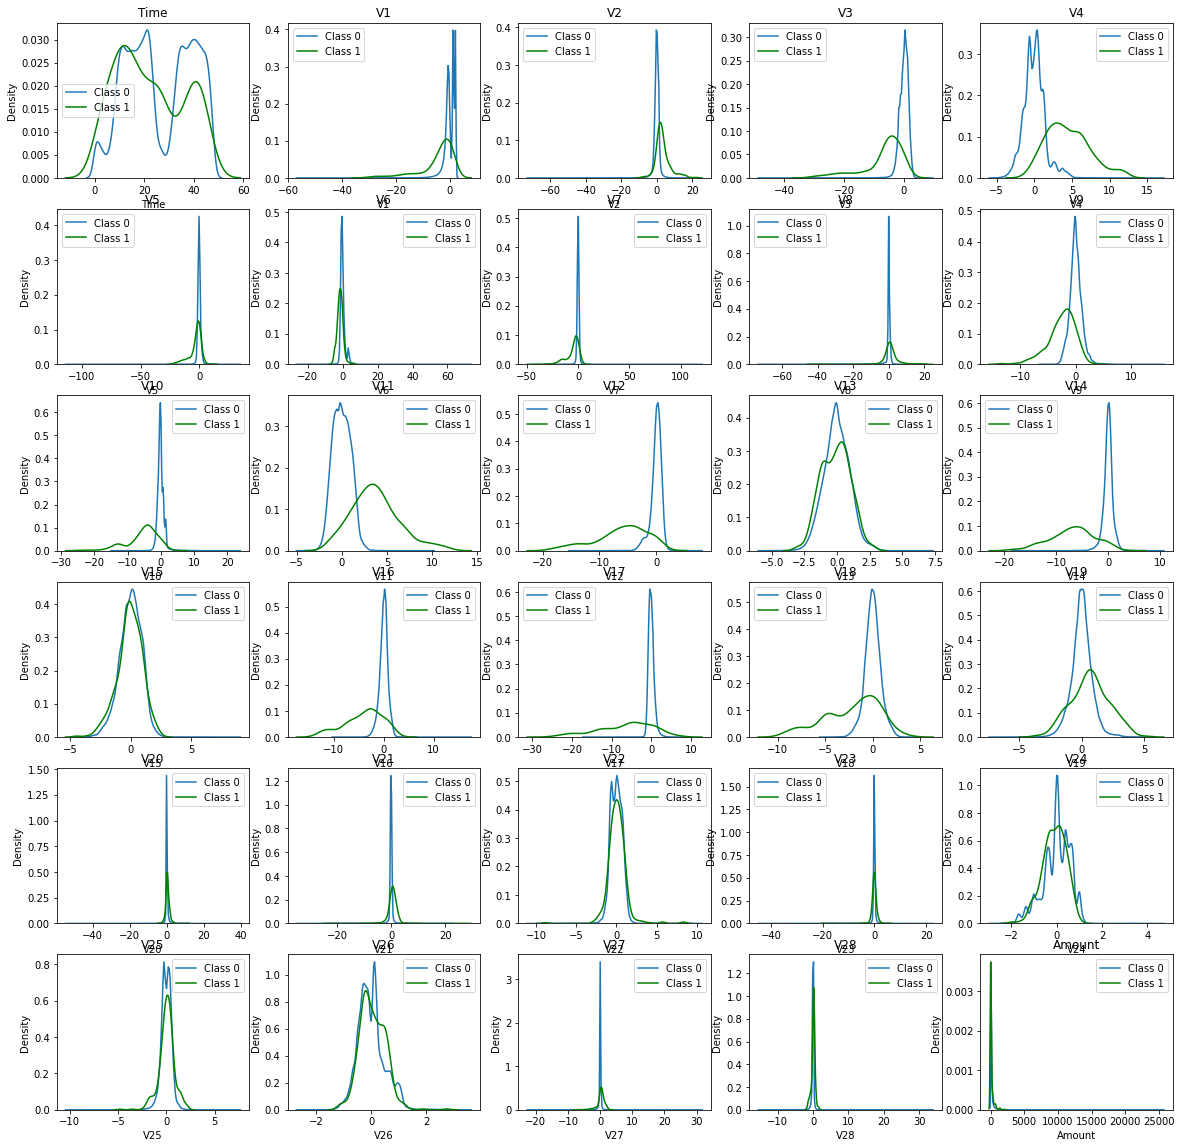

In [12]:
# plotting the distribution for all the  variables
df_col = df.columns.tolist() # get the list of variables
df_col.pop() # remove the class variable

fig, ax = plt.subplots(6,5,figsize=(20,20))
i=1
for col in df_col:
 plt.subplot(6,5,i) 
 sns.kdeplot(df.loc[df['Class']==0][col])
 sns.kdeplot(df.loc[df['Class']==1][col],color='g')
 plt.legend(['Class 0', 'Class 1' ])
 plt.title(col)
 i+=1

Almost all the variables are skewed and hence they have to be corrected before model building

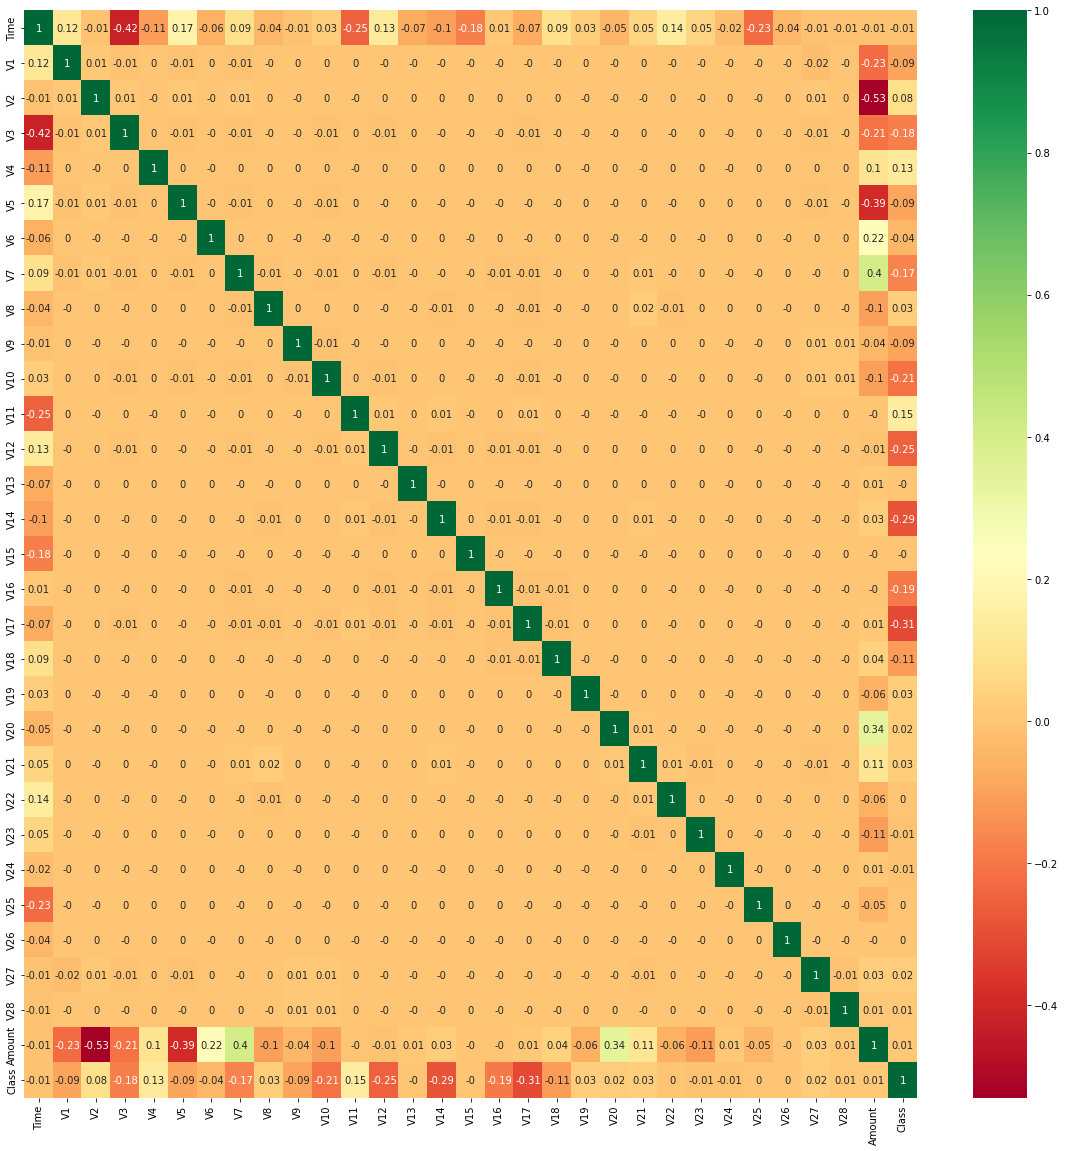

In [13]:
# Correlation
corrmat = df.corr()
corrmat.loc['Class'].sort_values()

plt.figure(figsize=(20,20))
sns.heatmap(round(corrmat,2),annot=True,cmap="RdYlGn")
plt.show()

The variables have no correlation among them

## **Data conversion**


Let's remove the sign "Time", because it has approximately the same distribution in the cases of both classes.

In [14]:
df2 = df.drop(columns = ['Time'])
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
# Given that the numerical features in the data set have a distribution close to normal, we normalize them
# Feature Scaling using their mean values
numeric = df2.iloc[:, :-1].columns
for col in numeric: df2[col] = (df2[col] - df2[col].mean()) / df2[col].std()
df2.head()       

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.701081,-0.041687,1.680098,0.976621,-0.247020,0.348012,0.193699,0.084434,0.333533,0.085688,...,-0.024777,0.383483,-0.177444,0.110157,0.247058,-0.392621,0.333032,-0.065849,0.244199,0
1,0.608791,0.164137,0.109279,0.318997,0.042258,-0.060980,-0.065656,0.072903,-0.231703,-0.153784,...,-0.311371,-0.881453,0.162080,-0.561502,0.321175,0.260853,-0.027154,0.043219,-0.342583,0
2,-0.700335,-0.811335,1.174268,0.270648,-0.366756,1.352652,0.643222,0.210788,-1.381167,0.194242,...,0.343094,1.065067,1.457769,-1.138482,-0.628159,-0.288860,-0.144325,-0.183824,1.158898,0
3,-0.499064,-0.109972,1.187381,-0.608354,-0.008814,0.937243,0.192079,0.320842,-1.264662,-0.049713,...,-0.149093,0.007299,-0.305464,-1.941443,1.242485,-0.460693,0.154039,0.185687,0.139886,0
4,-0.597605,0.535538,1.025468,0.287092,-0.297036,0.072872,0.481516,-0.228724,0.747915,0.700957,...,-0.012516,1.101778,-0.220708,0.232904,-0.394799,1.041676,0.550000,0.654233,-0.073813,0


Because the data of the target classes is very unbalanced, for balancing we will try to apply the SMOTE oversampling algorithm (synthesis of elements of a small class near existing ones):


In [16]:
sm = SMOTE(random_state = 42)

# Divide the normalized dataset into features and target class
x = df2.iloc[:, 1:-1].values
y = df2.iloc[:, -1].values

# Let's oversampling class elements
x_over, y_over = sm.fit_resample(x, y.ravel())

print('Number of labels "1" (fraud) after processing: ', len(y_over[y_over == 1]))
print('Number of marks "0" (normal) after processing: ', len(y_over[y_over == 0]))

# We divide the oversampled dataset into training and test samples in a ratio of 7 to 3
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.3, random_state = 42)

Number of labels "1" (fraud) after processing:  283253
Number of marks "0" (normal) after processing:  283253


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


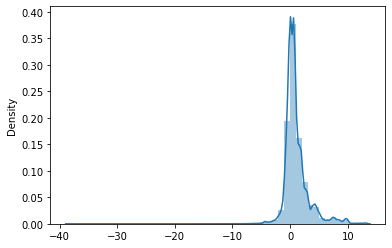

In [18]:
sns.distplot(x_train[:,0])
plt.show()

The skewness of the variables  are also reduced 

## **Model building**

Accuracy:  0.9412951892299002
ROC_AUC:  0.9871954257031623
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     84880
           1       0.97      0.91      0.94     85072

    accuracy                           0.94    169952
   macro avg       0.94      0.94      0.94    169952
weighted avg       0.94      0.94      0.94    169952



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


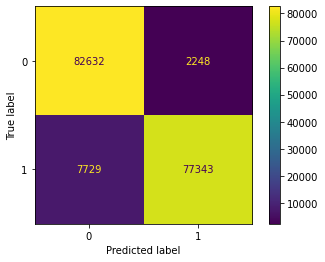

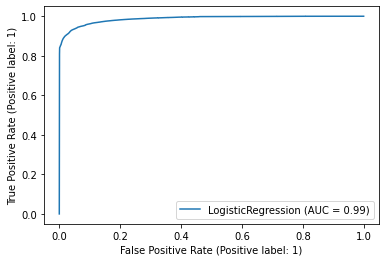

Accuracy:  0.9731536764343064
ROC_AUC:  0.9844984353442114
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    283253
           1       0.05      0.92      0.10       473

    accuracy                           0.97    283726
   macro avg       0.53      0.94      0.54    283726
weighted avg       1.00      0.97      0.98    283726



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


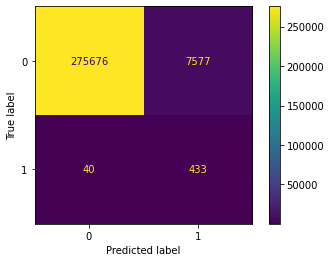

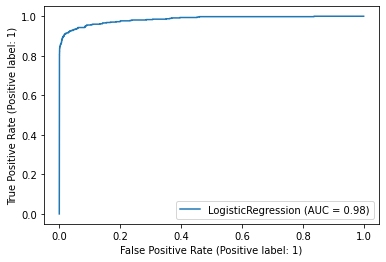

CPU times: user 5.88 s, sys: 2.06 s, total: 7.94 s
Wall time: 4.95 s


In [19]:
%%time
# Logistic regression

# We train the model on an oversampled dataset
model = LogisticRegression()
predictions = model.fit(x_train, y_train)

# Checking the model on an oversampled dataset
y_pred = model.predict(x_test)
conf = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(conf).plot()
print ('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print ('ROC_AUC: ', metrics.roc_auc_score(y_test, predictions.decision_function(x_test)))
print (metrics.classification_report(y_test, y_pred))
LR_disp = metrics.plot_roc_curve(model, x_test, y_test)
plt.show()

# Checking the model on the original normalized sample
y_pred = model.predict(x)
conf = metrics.confusion_matrix(y, y_pred)
metrics.ConfusionMatrixDisplay(conf).plot()
print ('Accuracy: ', metrics.accuracy_score(y, y_pred))
print ('ROC_AUC: ', metrics.roc_auc_score(y, predictions.decision_function(x)))
print (metrics.classification_report(y, y_pred))
LR_disp = metrics.plot_roc_curve(model, x, y)
plt.show()

Accuracy:  0.9745222180380343
ROC_AUC:  0.9980977304227703
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     84880
           1       0.99      0.96      0.97     85072

    accuracy                           0.97    169952
   macro avg       0.97      0.97      0.97    169952
weighted avg       0.97      0.97      0.97    169952



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


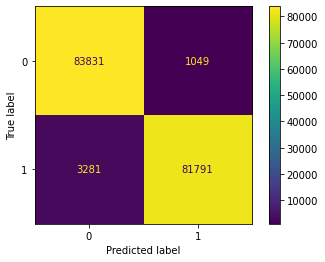

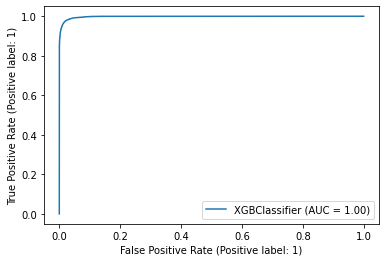

Accuracy:  0.987537271874978
ROC_AUC:  0.9974788001513883
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    283253
           1       0.11      0.96      0.20       473

    accuracy                           0.99    283726
   macro avg       0.56      0.97      0.60    283726
weighted avg       1.00      0.99      0.99    283726



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


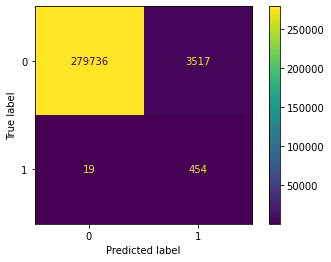

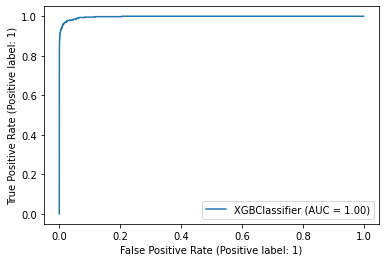

CPU times: user 2min, sys: 285 ms, total: 2min 1s
Wall time: 2min 4s


In [20]:
%%time
# Gradient boosting

# We train the model on an oversampled dataset
model = xgb.XGBClassifier(use_label_encoder = False)
predictions = model.fit(x_train, y_train)

# Checking the model on an oversampled dataset
y_pred = model.predict(x_test)
conf = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(conf).plot()
print ('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print ('ROC_AUC: ', metrics.roc_auc_score(y_test, predictions.predict_proba(x_test)[:, 1]))
print (metrics.classification_report(y_test, y_pred))
GB_disp = metrics.plot_roc_curve(model, x_test, y_test)
plt.show()

# Check the model on the original normalized sample
y_pred = model.predict(x)
conf = metrics.confusion_matrix(y, y_pred)
metrics.ConfusionMatrixDisplay(conf).plot()
print ('Accuracy: ', metrics.accuracy_score(y, y_pred))
print ('ROC_AUC: ', metrics.roc_auc_score(y, predictions.predict_proba(x)[:, 1]))
print (metrics.classification_report(y, y_pred))
GB_disp = metrics.plot_roc_curve(model, x, y)
plt.show()

Accuracy:  0.9998411316136321
ROC_AUC:  0.9999987057035415
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84880
           1       1.00      1.00      1.00     85072

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


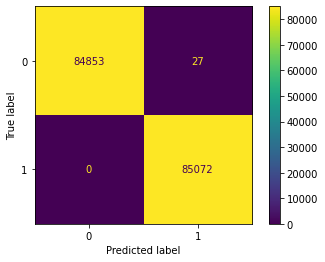

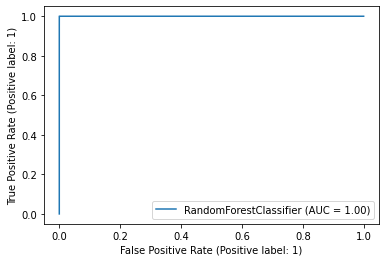

Accuracy:  0.9999048377660137
ROC_AUC:  0.9999989065423542
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.95      1.00      0.97       473

    accuracy                           1.00    283726
   macro avg       0.97      1.00      0.99    283726
weighted avg       1.00      1.00      1.00    283726



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


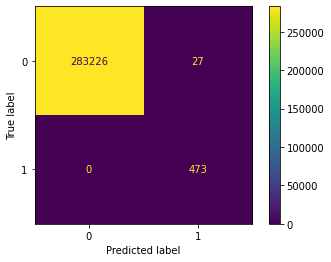

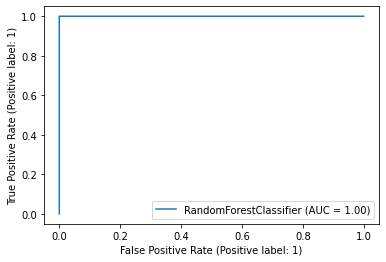

CPU times: user 7min 28s, sys: 611 ms, total: 7min 29s
Wall time: 7min 27s


In [21]:
%%time
# Random forest

# We train the model on an oversampled dataset
model = RandomForestClassifier(n_estimators = 100, random_state = 42)  
predictions = model.fit(x_train, y_train)

# Checking the model on an oversampled dataset
y_pred = model.predict(x_test)
conf = metrics.confusion_matrix(y_test, y_pred)
metrics.ConfusionMatrixDisplay(conf).plot()
print ('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print ('ROC_AUC: ', metrics.roc_auc_score(y_test, predictions.predict_proba(x_test)[:, 1]))
print (metrics.classification_report(y_test, y_pred))
RF_disp = metrics.plot_roc_curve(model, x_test, y_test)
plt.show()

# Checking the model on the original normalized sample
y_pred = model.predict(x)
conf = metrics.confusion_matrix(y, y_pred)
metrics.ConfusionMatrixDisplay(conf).plot()
print ('Accuracy: ', metrics.accuracy_score(y, y_pred))
print ('ROC_AUC: ', metrics.roc_auc_score(y, predictions.predict_proba(x)[:, 1]))
print (metrics.classification_report(y, y_pred))
RF_disp = metrics.plot_roc_curve(model, x, y)
plt.show()

Logistic regression is fast, but produce unacceptably high false positives. Tree methods are very slow, but much more accurate.
On Random Forest it takes a lot of time but with 0 false positive.
Based on the results, we choose the random forest method.

# **Processing pipeline**

## **Import packages**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

## **Loading data**

In [23]:
def data_load(path = '/content/drive/MyDrive/Creditcard Fraud detection/creditcard.csv'):
    return pd.read_csv(path)

## **Preliminary processing**

In [24]:
def data_prepare(df):
    df_ = df.drop_duplicates().drop(columns = ['Time'])
    numeric = df_.iloc[:, :-1].columns
    for col in numeric: df_[col] = (df_[col] - df_[col].mean()) / df_[col].std()
    return df_

## **Model training**

In [25]:
def model_fit(df):
    sm = SMOTE(random_state = 42)
    x = df.iloc[:, 1:-1].values
    y = df.iloc[:, -1].values
    x_over, y_over = sm.fit_resample(x, y.ravel())
    x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.3)
    model = RandomForestClassifier(n_estimators = 100, random_state = 42)  
    predictions = model.fit(x_train, y_train)
    return model

## **Sample Feature Class Prediction**

In [26]:
def data_predict(x, model):
    y_pred = model.predict(x)
    return y_pred

# **Work example**

In [27]:
%%time
# Loading the dataset, training the model
my_df = data_load()
my_model = model_fit(data_prepare(my_df))

CPU times: user 7min 27s, sys: 852 ms, total: 7min 27s
Wall time: 7min 25s


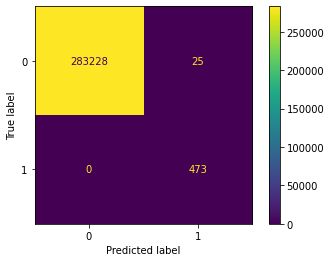

In [28]:
# We feed a sample to the model input to predict object classes
df_ = data_prepare(my_df)
x = df_.iloc[:, 1:-1].values
y = df_.iloc[:, -1].values
y_pred = data_predict(x, my_model)
conf = metrics.confusion_matrix(y, y_pred)
metrics.ConfusionMatrixDisplay(conf).plot()
plt.show()